# Descriptive Analysis

In [25]:
#Importing all the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)

In [29]:
#Reading the cleaned data 
survey1=pd.read_excel("Team8_PyMasters_Cleaned_data1.xlsx")
survey2=pd.read_excel("Team8_PyMasters_Cleaned_data2.xlsx")
survey3=pd.read_excel("Team8_PyMasters_Cleaned_data3.xlsx")

In [31]:
#Creating a copy of the original data to protect unnecessary modification in original data.
df1=survey1.copy()
df2=survey2.copy()
df3=survey3.copy()

# Q1. How many people participated in the survay?

***Resoning:***
***The bar chart visualization of total survey responses across the three phases provides a clear comparative overview of participant engagement. The results indicate a substantial disparity in response volume, with Survey Phase 1 accounting for the majority of responses (238,945), while Survey Phases 2 and 3 show significantly lower participation levels (11,723 and 15,534, respectively). This pronounced imbalance highlights the dominant influence of Phase 1 on the overall dataset and suggests that findings derived from aggregate analysis may be disproportionately driven by this phase.***
* ***It helps to decide which phases are reliable for deep analysis***
* ***Helps to adjust future survey strategies***

In [34]:
total_resp1 = len(df1)
total_resp2 = len(df2)
total_resp3 = len(df3)
#print("Total responses for Survay phase 1:", total_resp1)
#print("Total responses for Survay phase 2:", total_resp2)
#print("Total responses for Survay phase 3:", total_resp3)

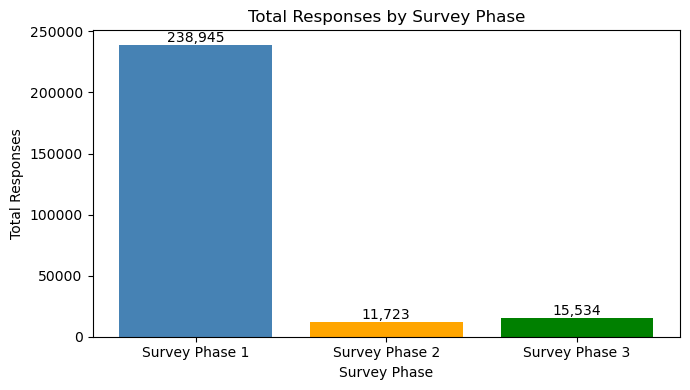

In [36]:
phases = ['Survey Phase 1', 'Survey Phase 2', 'Survey Phase 3']
responses = [total_resp1, total_resp2, total_resp3]

# Create bar chart
plt.figure(figsize=(7, 4))
bars = plt.bar(phases, responses, color=['steelblue', 'orange', 'green'])

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{height:,}',
             ha='center',
             va='bottom')

# Titles and labels
plt.title('Total Responses by Survey Phase')
plt.xlabel('Survey Phase')
plt.ylabel('Total Responses')

# Improve layout
plt.tight_layout()
plt.show()



# Q2. Which Forward Sortation Areas (FSAs) had the highest and lowest number of participants in each of the three survey schemas?
***Reasoning:***
***This analysis provides transparency about the data distribution and ensures conclusions drawn from the survey are more robust and fair.***
* ***Understand geographic coverage:***
    * ***By identifying FSAs with the most and least respondents, we can see which regions are well-represented and which are underrepresented in the survey.***
***Assess potential biases:***
    * ***If certain FSAs dominate the responses, the survey results might reflect the experiences of those regions more heavily.
Conversely, areas with very few respondents may not be accurately represented in the data.***
***Guide data interpretation and weighting:***
    * ***Knowledge of uneven participation can inform statistical adjustments, such as weighting responses to better represent under-sampled regions.***
* ***Inform future survey efforts:***
    * ***Highlighting FSAs with low participation can help target outreach in future surveys to improve representativeness.***

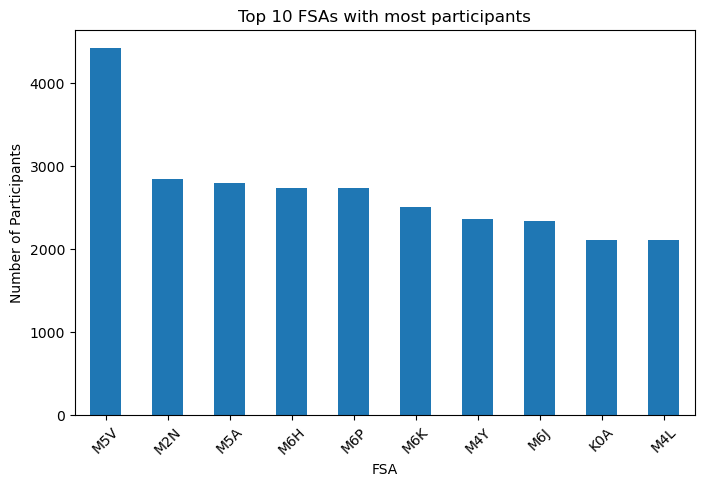

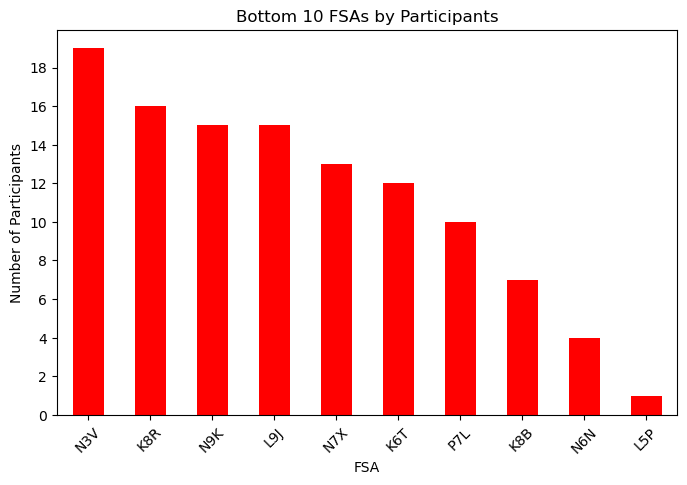

In [42]:
def fsa_counts(df):
     return df['fsa'].value_counts()

# Get FSA counts for each survey
fsa1 = fsa_counts(df1)
fsa2 = fsa_counts(df2)
fsa3 = fsa_counts(df3)

# Combine counts into one DataFrame
fsa_combined = pd.concat([fsa1, fsa2, fsa3], axis=1)
fsa_combined.columns = ['Phase1', 'Phase2', 'Phase3']

# Fill NaN with 0 (FSAs not present in some schemas)
fsa_combined = fsa_combined.fillna(0)

# Add total participants column
fsa_combined['Total'] = fsa_combined.sum(axis=1)

# Sort by total participants
fsa_combined = fsa_combined.sort_values(by='Total', ascending=False)

# Display the combined FSA counts

#print(fsa_combined)

# Optional: Plot top 10 FSAs by total participants
fsa_combined['Total'].head(10).plot(kind='bar', figsize=(8,5))
plt.title("Top 10 FSAs with most participants")
plt.xlabel("FSA")
plt.ylabel("Number of Participants")
plt.xticks(rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
fsa_combined['Total'].tail(10).plot(kind='bar', color='red', ax=ax, title='Bottom 10 FSAs by Participants')

#fsa_combined['Total'].tail(10).plot(kind='bar', figsize=(8,5))
#plt.title(" Top 10 FSAs with least participants")
plt.xlabel("FSA")
plt.ylabel("Number of Participants")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.show()

# Q3. How is participant age distributed across the three COVID-19 survey schemas, and how does the age composition differ between surveys?
***Resoning: This analysis examines the age distribution of participants across three survey schemas to assess demographic representativeness and identify potential age-related biases that may influence interpretation of COVID-19 symptom and exposure data.***
* ***Assess demographic representativeness***
    *   ***Age is a critical demographic factor influencing COVID-19 risk, symptom severity, and healthcare access.***
    *   ***Understanding how participants are distributed across age groups helps determine whether the survey population reflects the broader community.***
* ***Identify survey-specific age bias***
    *   ***Differences in age distributions across Survey 1, Survey 2, and Survey 3 may indicate changes in recruitment strategies, survey accessibility, or population engagement over time.***
    *   ***For example, a higher proportion of younger respondents in one survey could bias symptom prevalence or exposure estimates.***

In [45]:
def age_counts(df):
    # Automatically detect columns containing age groups
    age_columns = {
        '<26': [col for col in df.columns if 'age_1_<26' in col],
        '26-44': [col for col in df.columns if 'age_1_26-44' in col],
        '45-64': [col for col in df.columns if 'age_1_45-64' in col],
        '>65': [col for col in df.columns if 'age_1_>65' in col]
    }
    
    # Sum across columns in case there are multiple variants
    counts = {}
    for age_group, cols in age_columns.items():
        if cols:
            counts[age_group] = df[cols].sum().sum()  # sum across all columns and rows
        else:
            counts[age_group] = 0
    return counts
#Rename df1 age column to match with other dfs
df1_newCol = df1.rename(columns={'age_binary': 'age_1_>65'})


counts1 = age_counts(df1_newCol)
counts2 = age_counts(df2)
counts3 = age_counts(df3)
#print(age_counts_df3)

df_counts1 = pd.DataFrame(list(counts1.items()), columns=['Age Group', 'Survey1'])
df_counts2 = pd.DataFrame(list(counts2.items()), columns=['Age Group', 'Survey2'])
df_counts3 = pd.DataFrame(list(counts3.items()), columns=['Age Group', 'Survey3'])

# Merge by Age Group
combined_counts = pd.merge(df_counts1, df_counts2, on='Age Group')
combined_counts = pd.merge(combined_counts, df_counts3, on='Age Group')

# Add a Total column
combined_counts['Total'] = (
    combined_counts['Survey1'] +
    combined_counts['Survey2'] +
    combined_counts['Survey3']
)


# Calculate column totals
survey_totals = combined_counts[['Survey1','Survey2', 'Survey3']].sum()

# Calculate percentages
combined_counts['Survey1_%'] = (combined_counts['Survey1'] / survey_totals['Survey1']) * 100
combined_counts['Survey2_%'] = (combined_counts['Survey2'] / survey_totals['Survey2']) * 100
combined_counts['Survey3_%'] = (combined_counts['Survey3'] / survey_totals['Survey3']) * 100
grand_total = combined_counts['Total'].sum()

combined_counts['Overall_%'] = (combined_counts['Total'] / grand_total) * 100
#round percentage for readability
combined_counts[['Survey1_%','Survey2_%', 'Survey3_%', 'Overall_%']] = \
    combined_counts[['Survey1_%','Survey2_%', 'Survey3_%', 'Overall_%']].round(2)
#print(combined_counts)

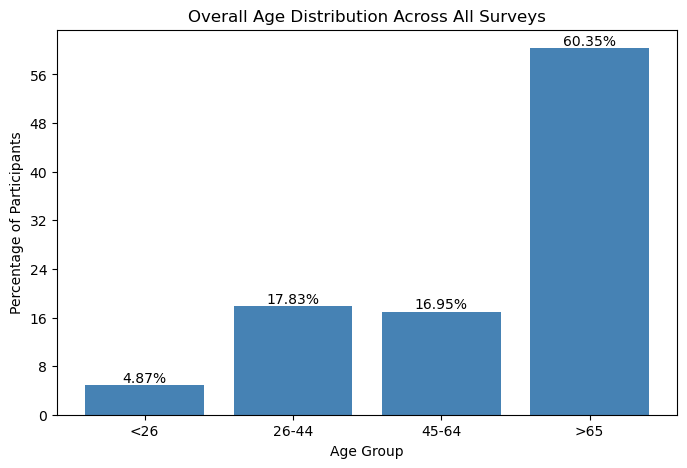

In [47]:
# creating chart to visulazation
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(
    combined_counts['Age Group'],
    combined_counts['Overall_%'],
    color='steelblue'
)

ax.set_title("Overall Age Distribution Across All Surveys")
ax.set_xlabel("Age Group")
ax.set_ylabel("Percentage of Participants")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Add value labels
for i, val in enumerate(combined_counts['Overall_%']):
    ax.text(i, val + 0.5, f"{val}%", ha='center')

plt.show()

# Q4. What is the "Probable" COVID-19 rate across different genders?

***Resoning: Health outcomes often differ by sex. This helps identify if one gender was reporting symptoms more frequently in Ontario during April 2020.***

In [50]:
gender_risk = df2.groupby('sex')['probable'].mean() * 100
print("\nProbable Case Rate by Sex (%):")
print(gender_risk)


Probable Case Rate by Sex (%):
sex
f     1.766326
m     1.634615
na    1.988636
Name: probable, dtype: float64


# Q5. Which ethnic groups are most represented in the survey?

***Resoning: Essential for checking "Health Equity." It shows whether the survey reached a diverse population or was limited to specific communities.***

Text(0.5, 1.0, 'Refined Distribution of Ethnicities (Clean Legend Only)')

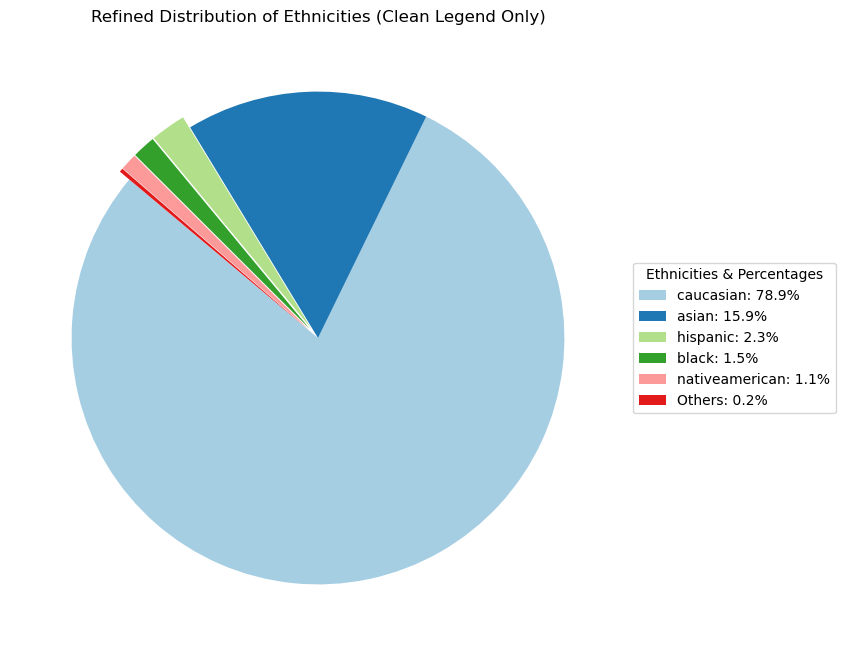

In [17]:
# 1. Filter and prepare data
to_exclude = ['none', 'na']
ethnicity_data = df2[~df2['ethnicity'].str.lower().isin(to_exclude)].copy()
full_counts = ethnicity_data['ethnicity'].value_counts()
combined_ethnicity = pd.concat([full_counts.head(5), pd.Series({'Others': full_counts.iloc[5:].sum()})])

# 2. Prepare legend labels with percentages
total = combined_ethnicity.sum()
legend_labels = [f'{label}: {(val/total)*100:.1f}%' for label, val in combined_ethnicity.items()]

# 3. Plotting
plt.figure(figsize=(12, 8))
explode = [0.05 if i > 1 else 0 for i in range(len(combined_ethnicity))] 

wedges, texts = plt.pie(
    combined_ethnicity, 
    labels=None, 
    autopct=None, # Percentages removed from slices
    startangle=140, 
    colors=plt.cm.Paired.colors,
    explode=explode
)

# 4. Final Legend and Title
plt.legend(wedges, legend_labels, title="Ethnicities & Percentages", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Refined Distribution of Ethnicities (Clean Legend Only)')

# Q6. What does the age-based vulnerability distribution imply for interpreting survey results?
***Resoning:The age-based vulnerability distribution shows that vulnerability increases with age, with older age groups—especially those aged 65 and above—being substantially more likely to be classified as vulnerable. This has several important implications for interpreting the survey results:***
* ***Age is a key confounding factor***
    * ***Many COVID-19–related outcomes (such as symptom severity, healthcare utilization, and risk status) are strongly influenced by age. If age is not accounted for, observed patterns in the survey may reflect age composition rather than true differences in risk or behavior.***
* ***Comparisons across groups or surveys must be age-adjusted***
    * ***If one survey or geographic area has a higher proportion of older participants, it may appear to have higher vulnerability or risk levels simply due to its age structure. Age stratification or weighting is therefore necessary for fair comparisons.***

In [11]:
age_vuln = []
age_columns = {
    '<26': 'age_1_<26',
    '26-44': 'age_1_26-44',
    '45-64': 'age_1_45-64',
    '>65': 'age_1_>65'
}
def create_age_vuln_df(df):
    age_vuln_list = []
    for age_group, col in age_columns.items():
        temp = df.loc[df[col] == 1, ['vulnerable']].copy()
        temp['Age Group'] = age_group
        age_vuln_list.append(temp)
    return pd.concat(age_vuln_list, ignore_index=True)

# Create combined age_vuln_df for multiple datasets
age_vuln_df = pd.concat([
    create_age_vuln_df(df2),
    create_age_vuln_df(df3)
], ignore_index=True)
# Vulnerable count
vuln_summary = (
    age_vuln_df
    .groupby('Age Group')['vulnerable']
    .agg(
        Total='count',
        Vulnerable='sum'
    )
    .reset_index()
)

vuln_summary['Not Vulnerable'] = (
    vuln_summary['Total'] - vuln_summary['Vulnerable']
)
vuln_summary_sorted = vuln_summary.sort_values(
    by='Vulnerable',  # column to sort by
    ascending=False   # descending order
).reset_index(drop=True)
# Percentage Vulnerable
vuln_summary_sorted['Vulnerable_%'] = (
    vuln_summary_sorted['Vulnerable'] / vuln_summary_sorted['Total'] * 100
).round(2)
#vuln_summary.sort_values(by='Vulnerable', ascending=False)
print(vuln_summary_sorted)

  Age Group  Total  Vulnerable  Not Vulnerable  Vulnerable_%
0       >65   3006        3006               0        100.00
1     45-64  10368        2046            8322         19.73
2     26-44  10906        1078            9828          9.88
3       <26   2977         192            2785          6.45


# Q7. What are the top 5 symptoms for individuals flagged as "Probable"?

***Resoning: Unlike Schema 1 (which had fixed symptom columns), Schema 2 uses a list. This identifies the specific "symptom signature" of suspected cases.***

In [12]:
# Filter for probable cases and expand the semicolon-separated symptom list
probable_cases = df2[df2['probable'] == 1]
symptom_profile = probable_cases['symptoms'].str.get_dummies(sep=';').sum().sort_values(ascending=False)

print("\nMost Common Symptoms in Probable Cases:")
print(symptom_profile.head(5))


Most Common Symptoms in Probable Cases:
none                 94
fever                63
cough                61
soreThroat           55
shortnessOfBreath    53
dtype: int64


# Q8. How does self-isolation affect mental health?
***Resoning: Self-isolation is associated with increased negative mental health outcomes. Interventions, such as virtual support, counseling, or social connection programs, are important to mitigate the psychological effects of isolation while maintaining public health safety.***
***The data shows that participants who self-isolated (y) report a higher proportion of negative mental health impacts compared to positive.***

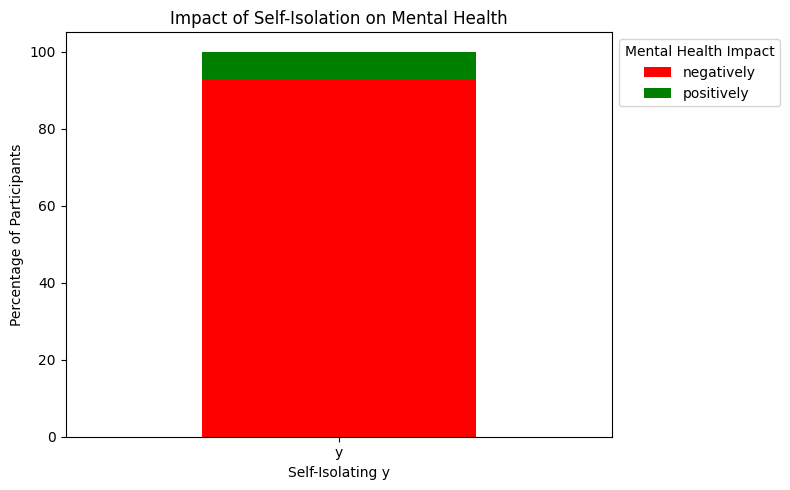

In [13]:
#Prepare data
# Keep only rows where mental_health_impact is 'negatively' or 'positively'
df_filtered = df3[df3['mental_health_impact'].isin(['negatively', 'positively'])]

# Keep only rows where self_isolating is 'y' 
df_filtered = df_filtered[df_filtered['self_isolating'].isin(['y'])]

# Count of mental health impact by self-isolation status
impact_counts = pd.crosstab(
    df_filtered['self_isolating'],
    df_filtered['mental_health_impact']
)

#Calculate Percentage
impact_percent = impact_counts.div(impact_counts.sum(axis=1), axis=0) * 100
impact_percent = impact_percent.round(2)

#print(impact_percent)
#Ploting chart
impact_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    color=['red','green']  # red=negatively, green=positively
)

plt.title("Impact of Self-Isolation on Mental Health")
plt.xlabel("Self-Isolating y")
plt.ylabel("Percentage of Participants")
plt.xticks(rotation=0)
plt.legend(title="Mental Health Impact", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


# Q9. Do "Vulnerable" individuals report "Shortness of Breath" more often than others?

***Resoning: Shortness of breath is a severe symptom. Checking if the vulnerable group (elderly/pre-existing conditions) reports this more frequently helps validate the "vulnerable" flag's logic.***

In [14]:
# Compare Vulnerable vs Non-Vulnerable
sob_comparison = df3.groupby('vulnerable')['symp_shortnessOfBreath'].mean() * 100

print("Percentage reporting Shortness of Breath:")
print(f"Non-Vulnerable: {sob_comparison[0]:.2f}%")
print(f"Vulnerable: {sob_comparison[1]:.2f}%")

Percentage reporting Shortness of Breath:
Non-Vulnerable: 0.96%
Vulnerable: 1.64%


# Q10. How did the reporting volume change from April to July?
*** Reasoning: This measures "Survey Fatigue." If participation dropped while actual hospital cases rose, it suggests that the app became less effective as a surveillance tool over time. ***

Reporting Volume per Month:
month
April    256489
May        6698
June       2343
July        672
Name: count, dtype: int64


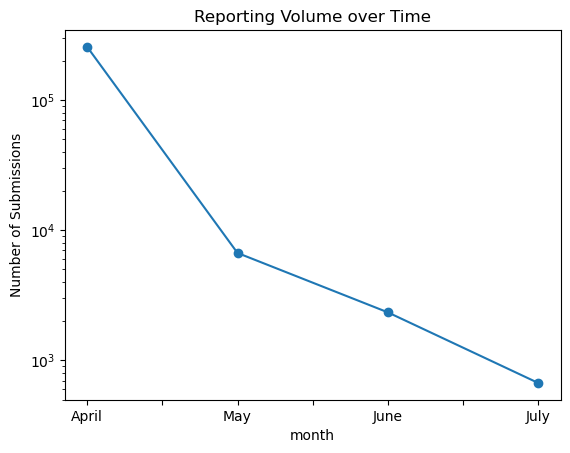

In [23]:
# 1. Combine the datasets horizontally
# We pad with NaNs where lengths differ to keep all records
df_combined = pd.concat([df1, df2, df3], axis=1)

# 3. Aggregate month counts across all dataframes for the volume trend
all_months = pd.concat([df1['month'], df2['month'], df3['month']])
monthly_engagement = all_months.value_counts().reindex(['April', 'May', 'June', 'July'])

print("Reporting Volume per Month:")
print(monthly_engagement)

# 4. Plot the trend
monthly_engagement.plot(kind='line', marker='o', title='Reporting Volume over Time')
plt.ylabel('Number of Submissions')
plt.yscale('log') # Log scale used due to the massive scale difference